# Loan Approval Prediction System

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, roc_auc_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
trn_data = pd.read_csv("loan-train.csv")
tst_data = pd.read_csv("loan-test.csv")

In [3]:
df = pd.concat([trn_data, tst_data], axis=0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [4]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [5]:
df.dropna(subset=["Loan_Status"], inplace=True)

In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df = df.bfill()

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


# EDA

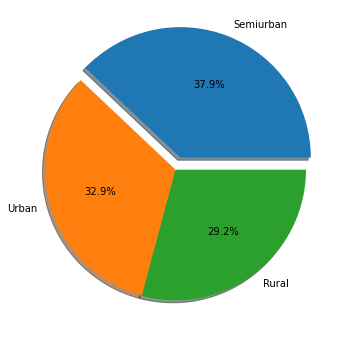

In [11]:
# PLot a Pie Chart
plt.figure(figsize=(6,6))
explode = (0.1, 0, 0)
plt.pie(list(df['Property_Area'].value_counts()), labels=list(df['Property_Area'].value_counts().keys()), 
        shadow=True, autopct ='%0.1f%%', explode=explode)
plt.show()

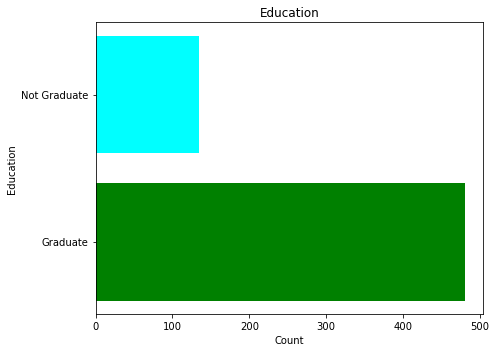

In [12]:
# Plot bar graph.
plt.figure(figsize=(7, 5))
plt.barh(y=df['Education'].value_counts().index, width=df['Education'].value_counts(), color=['Green','Cyan'])
plt.xlabel('Count')
plt.ylabel('Education')
plt.title('Education')
plt.tight_layout()
plt.show()


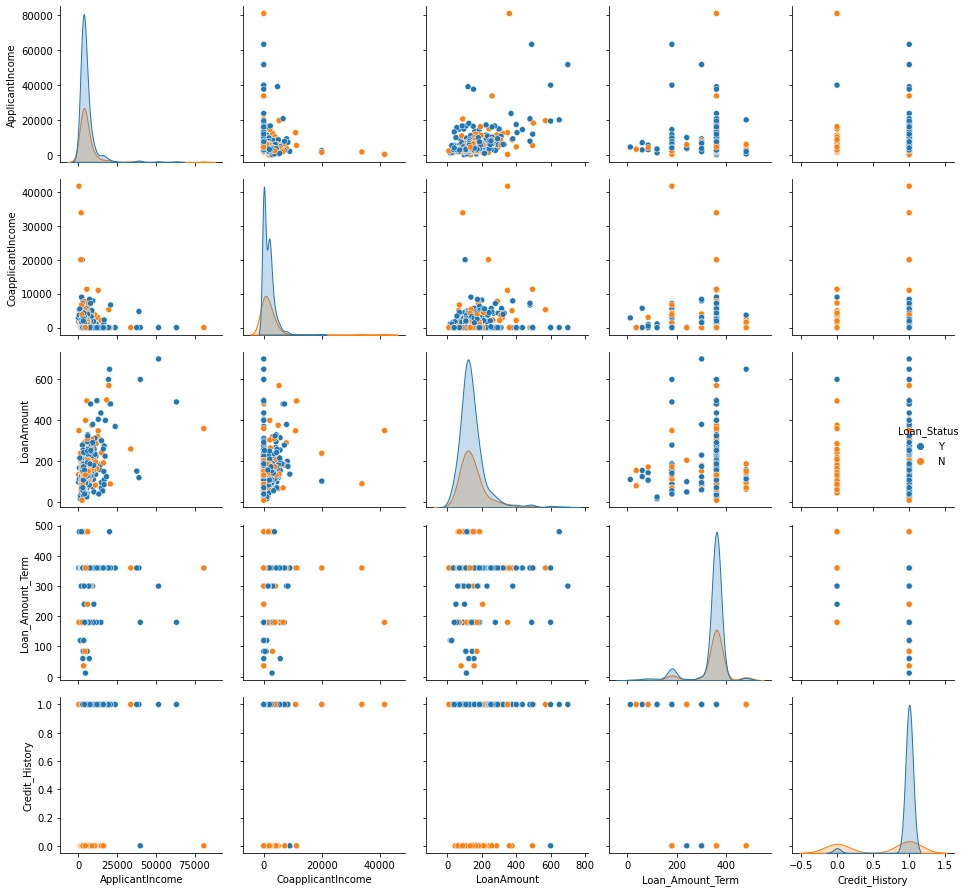

In [13]:
sns.pairplot(data = df, hue="Loan_Status" )
plt.tight_layout()
plt.show()

In [14]:
# perform lable encoding.
for col in df.columns:
    le=LabelEncoder()
    df[col]= le.fit_transform(df[col])

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


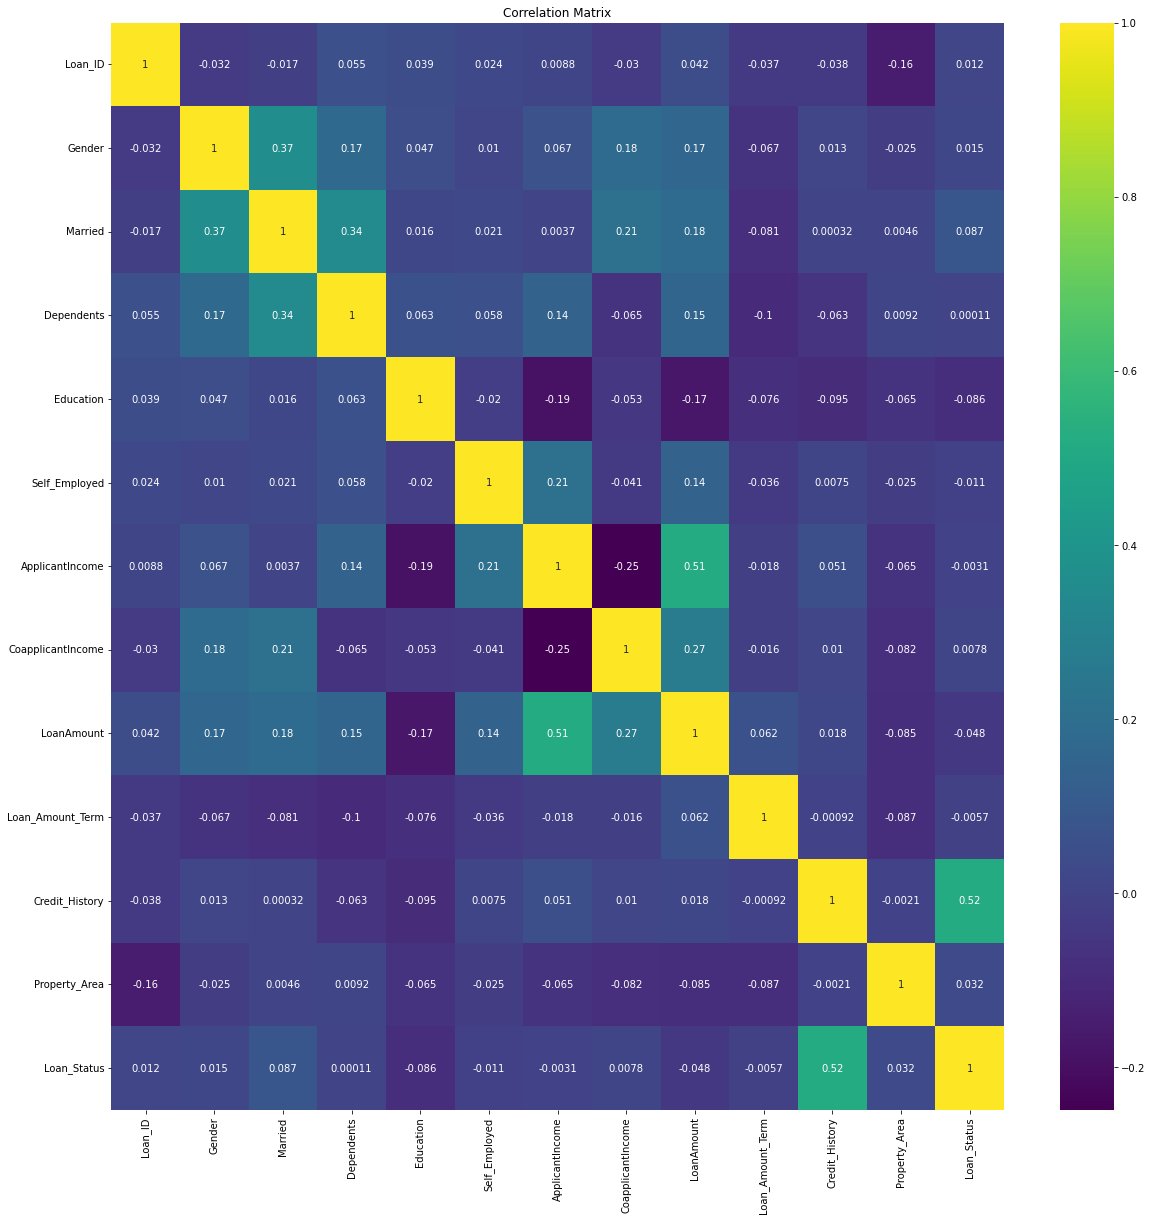

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Get the count for Approved and Non Approved loan.
approved = df["Loan_Status"].value_counts()[1]
non_approved =  df["Loan_Status"].value_counts()[0]
print("Approved loan {1}: ",approved,"Non Approved loan {0}: ",non_approved )

Approved loan {1}:  422 Non Approved loan {0}:  192


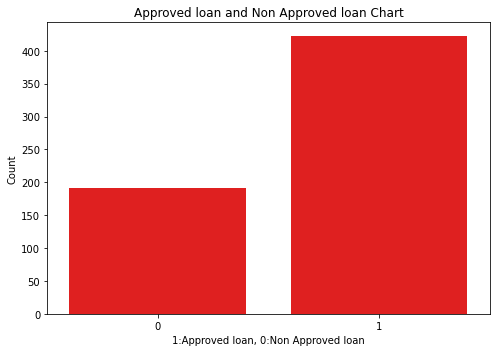

In [18]:
# Plot Bar Ghraph 
plt.figure(figsize=(7,5))
sns.barplot(x= df['Loan_Status'].value_counts().index, y= df['Loan_Status'].value_counts() , color='red')
plt.xlabel('1:Approved loan, 0:Non Approved loan')
plt.ylabel('Count')
plt.title("Approved loan and Non Approved loan Chart")
plt.tight_layout()
plt.show() 

In [19]:
# Use oversampling technique as our output feature is imbalanced.
X = df.drop("Loan_Status", axis =1)
y = df["Loan_Status"]

over_sampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = over_sampler.fit_resample(X, y)
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

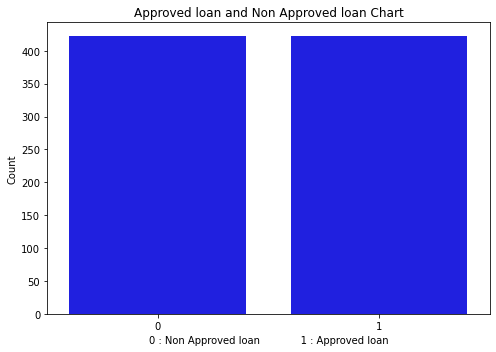

In [20]:
# Plot Bar Ghraph to check our output feature is balanced after oversampling.
plt.figure(figsize=(7,5))
sns.barplot(x= df_oversampled['Loan_Status'].value_counts().index, y= df_oversampled['Loan_Status'].value_counts() , color='blue')
plt.xlabel('0 : Non Approved loan             1 : Approved loan')
plt.ylabel('Count')
plt.title("Approved loan and Non Approved loan Chart")
plt.tight_layout()
plt.show() 

In [21]:
df_oversampled

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,202,1,1,3,1,0,266,0,88,5,1,2,0
840,583,1,1,1,0,0,27,0,22,8,0,0,0
841,584,1,1,1,0,0,115,111,99,8,0,0,0
842,400,1,1,2,1,0,122,0,10,5,0,2,0


In [38]:
# Define dependant & independant variables for oversampled df.
X = df_oversampled.drop("Loan_Status", axis =1)
y = df_oversampled["Loan_Status"]

In [39]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Apply differnt ML models
log = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf  = RandomForestClassifier()

In [41]:
# fit the model on train & test data set.
log_model = log.fit(X_train, y_train)
svc_model = svc.fit(X_train, y_train)
knn_odel = knn.fit(X_train, y_train)
dt_model  = dt.fit(X_train, y_train)
rf_model  = rf.fit(X_train, y_train)

In [42]:
# Calculate predicted values
log_pred = log.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred  = dt.predict(X_test)
rf_pred  = rf.predict(X_test)

In [43]:
# Calculate Accuracy score
log_score = accuracy_score(y_test, log_pred)
svc_score = accuracy_score(y_test, svc_pred)
knn_score = accuracy_score(y_test, knn_pred)
dt_score  = accuracy_score(y_test, dt_pred)
rf_score  = accuracy_score(y_test, rf_pred)

print("Accuracy score of Logistic Regression is : ",round(log_score,2))
print("Accuracy score of Support Vector Classifier is : ", round(svc_score,2))
print("Accuracy score of K Neighbors Classifier is : ", round(knn_score,2))
print("Accuracy score of Decision Tree Classifier is : ", round(dt_score,2))
print("Accuracy score of Random Forest Classifier is : ", round(rf_score,2))

Accuracy score of Logistic Regression is :  0.72
Accuracy score of Support Vector Classifier is :  0.46
Accuracy score of K Neighbors Classifier is :  0.6
Accuracy score of Decision Tree Classifier is :  0.86
Accuracy score of Random Forest Classifier is :  0.9


In [44]:
# Calculating cross-validation scores for different classifiers
log_cv_score = cross_val_score(log, X_train, y_train, cv=5)
svc_cv_score = cross_val_score(svc, X_train, y_train, cv=5)
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=5)
dt_cv_score  = cross_val_score(dt, X_train, y_train, cv=5)
rf_cv_score  = cross_val_score(rf, X_train, y_train, cv=5)

print("Cross-Validation score of Logistic Regression is : ", round(log_cv_score.mean(),2))
print("Cross-Validation score of Support Vector Classifier is : ", round(svc_cv_score.mean(),2))
print("Cross-Validation score of K Neighbors Classifier is : ", round(knn_cv_score.mean(),2))
print("Cross-Validation score of Decision Tree Classifier is : ", round(dt_cv_score.mean(),2))
print("Cross-Validation score of Random Forest Classifier is : ", round(rf_cv_score.mean(),2))

Cross-Validation score of Logistic Regression is :  0.74
Cross-Validation score of Support Vector Classifier is :  0.54
Cross-Validation score of K Neighbors Classifier is :  0.63
Cross-Validation score of Decision Tree Classifier is :  0.79
Cross-Validation score of Random Forest Classifier is :  0.86


In [45]:
# Calculate ROC AUC score
print("Logistic Regression ROC AUC score :", round(roc_auc_score(y_test,log_pred),2))
print("Support Vector Classifier ROC AUC score :", round(roc_auc_score(y_test,svc_pred),2))
print("K Nearest Neighbors ROC AUC score :", round(roc_auc_score(y_test,knn_pred),2))
print("Decision Tree Classifier ROC AUC score :", round(roc_auc_score(y_test,dt_pred),2))
print("Random Forest Classifier ROC AUC score :", round(roc_auc_score(y_test,rf_pred),2))

Logistic Regression ROC AUC score : 0.74
Support Vector Classifier ROC AUC score : 0.48
K Nearest Neighbors ROC AUC score : 0.59
Decision Tree Classifier ROC AUC score : 0.86
Random Forest Classifier ROC AUC score : 0.9


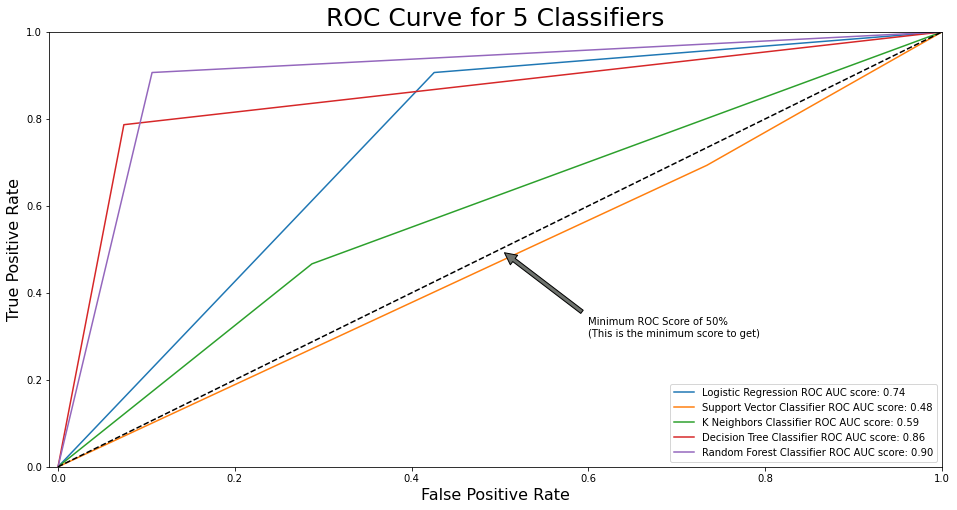

In [46]:
# Plot ROC curve
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_pred)
dt_fpr,  dt_tpr,  dt_threshold  = roc_curve(y_test, dt_pred)
rf_fpr,  rf_tpr,  rf_threshold  = roc_curve(y_test, rf_pred)

plt.figure(figsize=(16, 8))
plt.title('ROC Curve for 5 Classifiers', fontsize=25)
plt.plot(log_fpr, log_tpr, label="Logistic Regression ROC AUC score: {:.2f}".format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label="Support Vector Classifier ROC AUC score: {:.2f}".format(roc_auc_score(y_test, svc_pred)))
plt.plot(knn_fpr, knn_tpr, label="K Neighbors Classifier ROC AUC score: {:.2f}".format(roc_auc_score(y_test, knn_pred)))
plt.plot(dt_fpr,  dt_tpr, label="Decision Tree Classifier ROC AUC score: {:.2f}".format(roc_auc_score(y_test, dt_pred)))
plt.plot(rf_fpr,  rf_tpr, label="Random Forest Classifier ROC AUC score: {:.2f}".format(roc_auc_score(y_test, rf_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
plt.show()

In [47]:
# Define the models and their hyperparameter grids
models = {'Logistic Regression': LogisticRegression(),'Support Vector Classifier': SVC(),
    'K Nearest Neighbors': KNeighborsClassifier(),'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()}

param_grids = {'Logistic Regression': {'model__C': [0.1, 1, 10]},'Support Vector Classifier': {'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf']},'K Nearest Neighbors': {'model__n_neighbors': [3, 5, 7]},
    'Decision Tree Classifier': {'model__max_depth': [3, 5, 7]},
    'Random Forest Classifier': {'model__n_estimators': [50, 100, 150]}}

# Data preprocessing pipeline
preprocessor = Pipeline([('scaler', MinMaxScaler()), ('model', None)])


In [48]:
# Hyperparameter Tuning
for model_name, model in models.items():
    preprocessor.steps[1] = ('model', model)
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(preprocessor, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Training score for {model_name}: {grid_search.best_score_:.2f}")
    print()

Best parameters for Logistic Regression: {'model__C': 10}
Training score for Logistic Regression: 0.74

Best parameters for Support Vector Classifier: {'model__C': 10, 'model__kernel': 'rbf'}
Training score for Support Vector Classifier: 0.79

Best parameters for K Nearest Neighbors: {'model__n_neighbors': 3}
Training score for K Nearest Neighbors: 0.75

Best parameters for Decision Tree Classifier: {'model__max_depth': 7}
Training score for Decision Tree Classifier: 0.75

Best parameters for Random Forest Classifier: {'model__n_estimators': 100}
Training score for Random Forest Classifier: 0.86



In [52]:
# Classification Report for Random Forest Classifier
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        94
           1       0.87      0.91      0.89        75

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169



In [53]:
# Confusion Matrix Random Forest Classifier.
matrics = confusion_matrix(y_test, rf_pred)
print(matrics)

[[84 10]
 [ 7 68]]


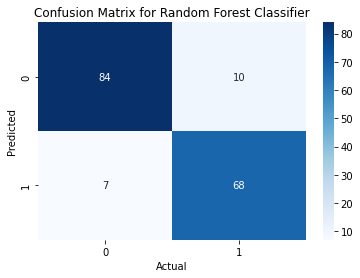

In [54]:
# Create a heatmap for the confusion matrix
sns.heatmap(matrics, annot=True,  cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


# Conclusion: 

Loan Approval Prediction using Machine Learning offers financial institutions a reliable tool to assess loan applications, optimize loan portfolios, and make informed decisions while ensuring compliance with regulatory guidelines. The proposed solution leverages machine learning algorithms and applicant data analysis to accurately predict the likelihood of loan approval, enabling lenders to streamline their operations, reduce risk, and provide better customer experiences. From the above obervations we can conclude that Random Forest Classifier is best suited ML Model for Loan Approval Prediction System.